# Dynamic Crowd Loading Simulation

This Python code serves as an introductory example of simulating dynamic crowd loading on a bridge. It focuses on calculating the dynamic load factor (DLF) and pacing frequency of a pedestrian walking across the bridge, providing insights into the resulting vertical ground reaction force exerted on the structure.

## Purpose:

The primary goal is to illustrate how Python can be utilized to model the dynamic effects of pedestrian movement on a bridge. The code calculates the DLF, a multiplier applied to the static weight of a pedestrian to determine the dynamic load on the bridge. Additionally, it computes the pacing frequency, representing the number of steps taken per second by the pedestrian.

## Code Overview:

1. **Imported Libraries:**
   - The code begins by importing essential libraries: `math`, `numpy`, and `matplotlib.pyplot`.

2. **Variable Definitions:**
   - Defines key variables such as the span of the bridge deck (`L`), walking velocity of the pedestrian (`vp`), crossing time (`t_Max`), mass of the pedestrian (`m`), and static weight (`G`).

3. **Dynamic Load Factor (DLF) Calculation:**
   - The DLF is calculated using the formula:
     $$ \text{DLF} = 0.35 \cdot vp^3 - 1.59 \cdot vp^2 + 2.93 \cdot vp $$
     - \( `v_p` \): Walking velocity of the pedestrian.
     - Explanation: The DLF is a multiplier that captures the dynamic amplification of the pedestrian's weight based on their walking speed. This equation models the complex relationship between walking velocity and the dynamic effects on the bridge.

4. **Pacing Frequency Calculation:**
   - The pacing frequency (`fv`) is derived from the calculated DLF, using the formula:
     $$ fv = 0.95 \cdot \text{DLF} $$
     - Explanation: The pacing frequency represents the number of steps taken per second by the pedestrian. It is closely related to the DLF and provides additional insights into the dynamic behavior of the pedestrian's movement on the bridge.

5. **Printed Information:**
   - Prints the DLF and pacing frequency for user reference.

6. **Simulation and Plotting:**
   - Utilizes a time-stepping approach to simulate the vertical ground reaction force over time.
   - Employs Matplotlib to create a plot, visualizing the force exerted by the pedestrian on the bridge.

## Additional Details:

- **Constant Walking Speed:** The code assumes a constant walking speed of the pedestrian.
- **External Factors:** The simulation does not consider external factors such as wind or environmental influences, focusing on the fundamental dynamic effects of pedestrian movement.
- **Educational Purpose:** The code is intended for educational purposes, and caution is advised when applying it to real-world engineering scenarios.



In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## An introduction to dynamic crowd loading

In [2]:
L = 60 # (m) span of the bridge deck
vp = 1.3 # (m/s) walking velocity
tMax = L/vp # (s) crossing time
m = 80 #(kg) mass of the pedestrian
G = m*9.81 # (N) static weight of pedestrian

fv = 0.35*vp**3 - 1.59*vp**2 + 2.93*vp
DLF = 0.41*(fv - 0.95)

print(f"- The DLF = {DLF:.3f} and the pacing frequency is {fv:.2f}Hz. i.e {fv:.2f} steps per second")
print(f"- Duration of a single step is {(1/fv):.2f} seconds")

- The DLF = 0.386 and the pacing frequency is 1.89Hz. i.e 1.89 steps per second
- Duration of a single step is 0.53 seconds


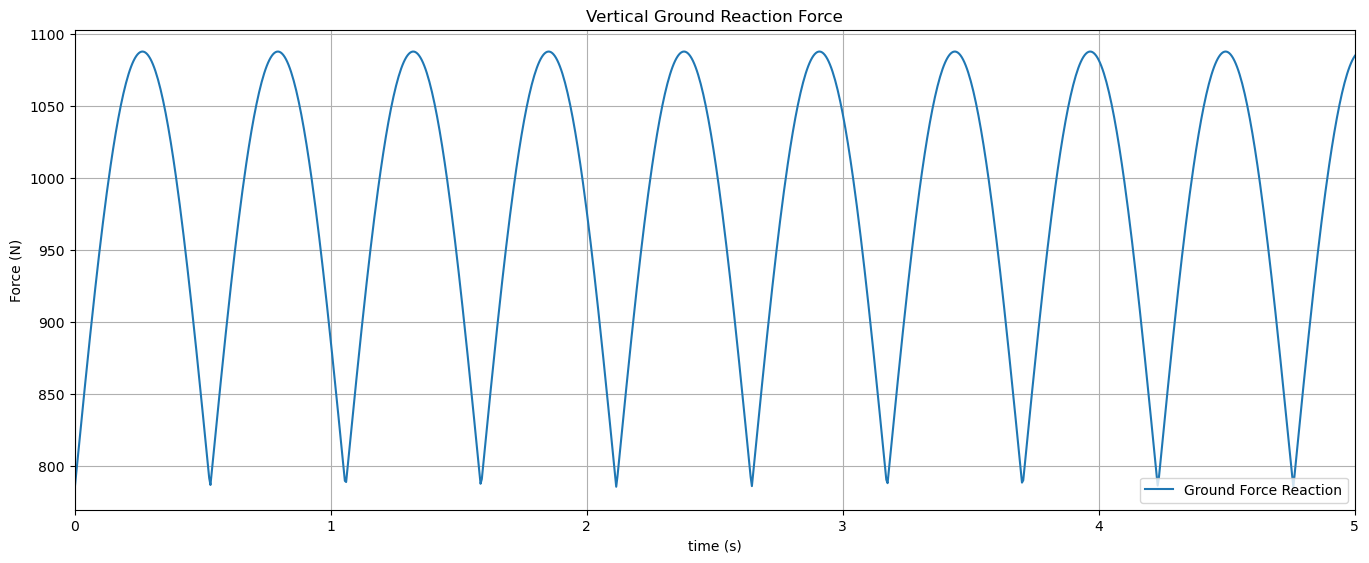

In [3]:
delT = 0.005 #time-step
time = np.arange(0, tMax+delT, delT) #time vector
Fv = G + abs(G * DLF*np.sin(2*math.pi*(fv/2)*time)) #static + dynamic ground reaction force

fig = plt.figure()
axes = fig.add_axes([0.1,0.1,2,1])
axes.plot(time, Fv, label='Ground Force Reaction')


axes.set_xlabel('time (s)')
axes.set_ylabel('Force (N)')
axes.set_title('Vertical Ground Reaction Force')
axes.legend(loc='lower right')
axes.set_xlim([0, 5])
plt.grid()
plt.show()